In [1]:
# Set up packages for lecture. Don't worry about understanding this code, but
# make sure to run it if you're following along.
import numpy as np
import babypandas as bpd
import pandas as pd
from matplotlib_inline.backend_inline import set_matplotlib_formats
import matplotlib.pyplot as plt
%reload_ext pandas_tutor
%set_pandas_tutor_options {'projectorMode': True}
set_matplotlib_formats("svg")
plt.style.use('fivethirtyeight')

np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

# Lecture 11 – Conditional Statements and Iteration

## DSC 10, Fall 2022

### Announcements

- Homework 3 is due **tomorrow at 11:59PM**.
- Lab 4 is due on **Saturday, 10/22 at 11:59PM**.
- The Midterm Project will be released Wednesday!
    - Partners are not required, but strongly encouraged.
    - Your partner doesn't have to be from your lecture section.
    - Before or after discussion **today**, we'll host a mixer to help you find a partner! See [this](https://edstem.org/us/courses/29053/discussion/1970202) post on EdStem for details.
    - You must use the [pair programming](https://dsc10.com/pair-programming/) model when working with a partner.
- If you have a **conflict** with your assigned discussion, email TA Dasha (dveraksa@ucsd.edu) to request to attend another.
- Look at the [Grade Report](https://www.gradescope.com/courses/443300/assignments/2326925/) on Gradescope to see your scores on all assignments, discussion attendance, and number of used slip days so far.

### Agenda

- Booleans.
- Conditional statements (i.e. `if`-statements).
- Iteration (i.e. `for`-loops).

**Note:** 
- We've finished introducing new DataFrame manipulation techniques. 
- Today we'll cover some foundational programming tools, which will be very relevant as we start to cover more ideas in statistics (next week).

## Booleans

### Recap: Booleans

- `bool` is a data type in Python, just like `int`, `float`, and `str`. 
    - It stands for "Boolean", named after George Boole, an early mathematician.
- There are only two possible Boolean values: `True` or `False`.
    - Yes or no.
    - On or off.
    - 1 or 0.
- Comparisons result in Boolean values.

In [2]:
capstone = 'finished'
units = 123

In [3]:
units >= 180

False

In [4]:
type(units >= 180)

bool

### Boolean operators; `not`

There are three operators that allow us to perform arithmetic with Booleans – `not`, `and`, and `or`.

`not` flips `True` ↔️ `False`.

In [5]:
capstone

'finished'

In [6]:
capstone == 'finished'

True

In [7]:
not capstone == 'finished'

False

### The `and` operator

The `and` operator is placed between two `bool`s. It is `True` if **both** are `True`; otherwise, it's `False`.

In [8]:
capstone

'finished'

In [9]:
units

123

In [10]:
capstone == 'finished' and units >= 180

False

In [11]:
capstone == 'finished' and units >= 120

True

### The `or` operator

The `or` operator is placed between two `bool`s. It is `True` if **at least one** is `True`; otherwise, it's `False`.

In [12]:
capstone

'finished'

In [13]:
units

123

In [14]:
capstone == 'finished' or units >= 180

True

In [15]:
# Both are True!
capstone == 'finished' or units >= 0

True

In [16]:
# Both are False!
capstone == 'not started' or units >= 180

False

### Order of operations

- By default, the order of operations is `not`, `and`, `or`. See the _precedence_ of all operators in Python [here](https://www.programiz.com/python-programming/precedence-associativity).
- As usual, use **`(`parentheses`)`** to make expressions more clear.

In [17]:
capstone

'finished'

In [18]:
units

123

In [19]:
capstone == 'finished' or (capstone == 'in progress' and units >= 180)

True

In [20]:
# Different meaning!
(capstone == 'finished' or capstone == 'in progress') and units >= 180

False

In [21]:
# "and" has precedence.
capstone == 'finished' or capstone == 'in progress' and units >= 180

True

### Booleans can be tricky!

For instance, `not (a and b)` is **different** than `not a and not b`! If you're curious, read more about [De Morgan's Laws](https://blog.penjee.com/what-is-demorgans-law-in-programming-answered-with-pics/).

In [22]:
capstone

'finished'

In [23]:
units

123

In [24]:
not (capstone == 'finished' and units >= 180)

True

In [25]:
not(True and False)

True

In [26]:
not(True) and not(False)

False

In [27]:
(not capstone == 'finished') and (not units >= 180)

False

### Note: `&` and `|` vs. `and` and `or`

- Use the `&` and `|` operators between two **Series**. Arithmetic will be done element-wise (separately for each row).
    - This is relevant when writing DataFrame queries, e.g. `df[(df.get('capstone') == 'finished') & (df.get('units') >= 180)]`.

- Use the `and` and `or` operators between two **individual** Booleans.
    - e.g. `capstone == 'finished' and units >= 180`.

### Concept Check ✅ – Answer at [cc.dsc10.com](http://cc.dsc10.com) 

Suppose we define `a = True` and `b = True`. What does the following expression evaluate to?

```py
not (((not a) and b) or ((not b) or a))
```

A. `True`

B. `False`

C. Could be either one

### Aside: the `in` operator

Sometimes, we'll want to check if a particular element is in a list/array, or a particular **substring** is in a string. The `in` operator can do this for us:

In [28]:
3 in [1, 2, 3]

True

In [29]:
'hey' in 'hey my name is'

True

In [30]:
'dog' in 'hey my name is'

False

## Conditionals

### `if`-statements

- Often, we'll want to run a block of code only if a particular conditional expression is `True`.
- The syntax for this is as follows (don't forget the colon!):


```py
if <condition>:
    <body>
```
            
- Indentation matters!

In [31]:
capstone = 'finished'
capstone

'finished'

In [32]:
if capstone == 'finished':
    print('Looks like you are ready to graduate!')

Looks like you are ready to graduate!


### `else`

`else`: Do something else if the specified condition is `False`.

In [33]:
capstone = 'finished'
capstone

'finished'

In [34]:
if capstone == 'finished':
    print('Looks like you are ready to graduate!')
else:
    print('Before you graduate, you need to finish your capstone project.')

Looks like you are ready to graduate!


### `elif`

- What if we want to check more than one condition? Use `elif`.
- `elif`: if the specified condition is `False`, check the next condition.
- If that condition is `False`, check the next condition, and so on, until we see a `True` condition.
    - After seeing a `True` condition, it evaluates the indented code and stops.
- If none of the conditions are `True`, the `else` body is run.

In [35]:
capstone = 'in progress'
units = 123

In [36]:
if capstone == 'finished' and units >= 180:
    print('Looks like you are ready to graduate!')
elif capstone != 'finished' and units < 180:
    print('Before you graduate, you need to finish your capstone project and take', 180 - units, 'more units.')
elif units >= 180:
    print('Before you graduate, you need to finish your capstone project.')
else:
    print('Before you graduate, you need to take', 180 - units, 'more units.')

Before you graduate, you need to finish your capstone project and take 57 more units.


What if we use `if` instead of `elif`?

In [37]:
if capstone == 'finished' and units >= 180:
    print('Looks like you are ready to graduate!')
if capstone != 'finished' and units < 180:
    print('Before you graduate, you need to finish your capstone project and take', 180 - units, 'more units.')
if units >= 180:
    print('Before you graduate, you need to finish your capstone project.')
else:
    print('Before you graduate, you need to take', 180 - units, 'more units.')

Before you graduate, you need to finish your capstone project and take 57 more units.
Before you graduate, you need to take 57 more units.


### Example: Percentage to letter grade

Below, complete the implementation of the function, `grade_converter`, which takes in a percentage grade (`grade`) and returns the corresponding letter grade, according to this table:

| Letter | Range |
| --- | --- |
| A | [90, 100] |
| B | [80, 90) |
| C | [70, 80) |
| D | [60, 70) |
| F | [0, 60)

Your function should work on these examples:

```py
>>> grade_converter(84)
'B'

>>> grade_converter(60)
'D'
```

In [38]:
def grade_converter(grade):
    if grade >= 90:
        return 'A'
    elif grade >= 80:
        return 'B'
    elif grade >= 70:
        return 'C'
    elif grade >= 60:
        return 'D'
    else:
        return 'F'

In [39]:
grade_converter(84)

'B'

In [40]:
grade_converter(60)

'D'

### Activity

```py

def mystery(a, b):
    if (a + b > 4) and (b > 0):
        return 'bear'
    elif (a * b >= 4) or (b < 0):
        return 'triton'
    else:
        return 'bruin'
```

Without running code:
1. What does `mystery(2, 2)` return?
1. Find inputs so that calling `mystery` will produce `'bruin'`.

In [41]:
def mystery(a, b):
    if (a + b > 4) and (b > 0):
        return 'bear'
    elif (a * b >= 4) or (b < 0):
        return 'triton'
    else:
        return 'bruin'

## Iteration

<center><img src='images/iteration.png' width=60%></center>

### `for`-loops

In [42]:
import time

print('Launching in...')

for x in [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]:
    print('t-minus', x)
    time.sleep(0.5) # Pauses for half a second
    
print('Blast off! 🚀')

Launching in...
t-minus 10
t-minus 9
t-minus 8
t-minus 7
t-minus 6
t-minus 5
t-minus 4
t-minus 3
t-minus 2
t-minus 1
Blast off! 🚀


### `for`-loops

- Loops allow us to repeat the execution of code. There are two types of loops in Python; the `for`-loop is one of them.
- The syntax of a `for`-loop is as follows:
```py
for <element> in <sequence>:
    <body>
```
- Read this as: "for each element of this sequence, repeat this code." 
    - Note: lists, arrays, and strings are all examples of sequences.
- Like with `if`-statements, indentation matters!

### Example: Squares

In [43]:
num = 4
print(num, 'squared is', num ** 2)

num = 2
print(num, 'squared is', num ** 2)

num = 1
print(num, 'squared is', num ** 2)

num = 3
print(num, 'squared is', num ** 2)

4 squared is 16
2 squared is 4
1 squared is 1
3 squared is 9


In [44]:
# The loop variable can be anything!

list_of_numbers = [4, 2, 1, 3]

for num in list_of_numbers:
    print(num, 'squared is', num ** 2)

4 squared is 16
2 squared is 4
1 squared is 1
3 squared is 9


The line `print(num, 'squared is', num ** 2)` is run four times:
- On the first iteration, `num` is 4.
- On the second iteration, `num` is 2.
- On the third iteration, `num` is 1.
- On the fourth iteration, `num` is 3.

This happens, even though there is no `num = ` anywhere.

### Activity

Using the array `colleges`, write a `for`-loop that prints:

```
Revelle College
John Muir College
Thurgood Marshall College
Earl Warren College
Eleanor Roosevelt College
Sixth College
Seventh College
```

<br>
<details>
    <summary>Click here to see the solution <b>after</b> you've tried it yourself.</summary>
<br>
<pre>
for college in colleges:
    print(college + ' College')
</pre>
    
</details>

In [45]:
colleges = np.array(['Revelle', 'John Muir', 'Thurgood Marshall', 
            'Earl Warren', 'Eleanor Roosevelt', 'Sixth', 'Seventh'])

In [46]:
for college in colleges:
    print(college, 'College')

Revelle College
John Muir College
Thurgood Marshall College
Earl Warren College
Eleanor Roosevelt College
Sixth College
Seventh College


### Ranges

- Recall, each element of a list/array has a numerical position.
    - The position of the first element is 0, the position of the second element is 1, etc.
- We can write a `for`-loop that accesses each element in an array by using its position.
- `np.arange` will come in handy.

In [47]:
actions = np.array(['ate', 'slept', 'exercised'])
feelings = np.array(['content 🙂', 'energized 😃', 'exhausted 😩'])

In [48]:
len(actions)

3

In [49]:
for i in np.arange(len(actions)):
    print(i)

0
1
2


In [50]:
for i in np.arange(len(actions)):
    for j in range(len(feelings)):
        print('I', actions[i], 'and I felt', feelings[i])
print(range(10))
print(np.arange(10))

I ate and I felt content 🙂
I ate and I felt content 🙂
I ate and I felt content 🙂
I slept and I felt energized 😃
I slept and I felt energized 😃
I slept and I felt energized 😃
I exercised and I felt exhausted 😩
I exercised and I felt exhausted 😩
I exercised and I felt exhausted 😩
range(0, 10)
[0 1 2 3 4 5 6 7 8 9]


### Example: Goldilocks and the Three Bears

We don't have to use the loop variable!

In [51]:
for i in np.arange(3):
    print('🐻')

🐻
🐻
🐻


### Randomization and iteration

- In the next few lectures, we'll learn how to **simulate** random events, like flipping a coin.

- Often, we will:
    1. Run an experiment, e.g. "flip 10 coins."
    2. Keep track of some result, e.g. "number of heads."
    3. Repeat steps 1 and 2 many, many times using a `for`-loop.

### Storing the results

- To store our results, we'll typically use an `int` or an array.
- If using an `int`, we define an `int` variable (usually to `0`) before the loop, then use `+` to add to it inside the loop.
- If using an array, we create an array (usually empty) before the loop, then use `np.append` to add to it inside the loop.
 


<center><img src='images/append.jpg' width=60%></center>


### `np.append`

- This function takes two inputs:
    - an array
    - an element to add on to the end of the array
- It returns a new array. It does not modify the input array. 
- We typically use it like this to extend an array by one element:
    `name_of_array = np.append(name_of_array, element_to_add)`
- Remember to **store the result**!

In [52]:
some_array = np.array([])

In [53]:
np.append(some_array, 'hello')

array(['hello'], dtype='<U32')

In [54]:
some_array

array([], dtype=float64)

In [55]:
# Need to save the new array!
some_array = np.append(some_array, 'hello')
some_array

array(['hello'], dtype='<U32')

In [56]:
some_array = np.append(some_array, 'there')
some_array

array(['hello', 'there'], dtype='<U32')

### Example: Coin flipping

The function `flip(n)` flips `n` fair coins and returns the number of heads it saw. (Don't worry about how it works for now.)

In [57]:
def flip(n):
    '''Returns the number of heads in n simulated coin flips, using randomness.'''
    return np.random.multinomial(n, [0.5, 0.5])[0]

In [58]:
# Run this cell a few times – you'll see different results!
flip(10)

3

Let's repeat the act of flipping 10 coins, 10000 times. 
- Each time, we'll use the `flip` function to flip 10 coins and compute the number of heads we saw.
- We'll store these numbers in an array, `heads_array`.
- Every time we use our `flip` function to flip 10 coins, we'll add an element to the end of `heads_array`.

In [59]:
# heads_array starts empty – before the simulation, we haven't flipped any coins!
heads_array = np.array([])

for i in np.arange(10000):
    
    # Flip 10 coins and count the number of heads.
    num_heads = flip(10)
    
    # Add the number of heads seen to heads_array.
    heads_array = np.append(heads_array, num_heads)

Now, `heads_array` contains 10000 numbers, each corresponding to the number of heads in 10 simulated coin flips.

In [60]:
heads_array

array([3., 6., 5., ..., 6., 3., 4.])

In [61]:
len(heads_array)

10000

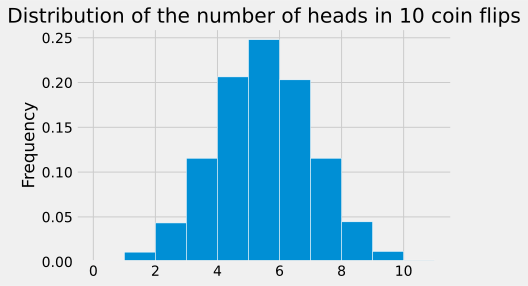

In [62]:
(bpd.DataFrame().assign(num_heads=heads_array)
 .plot(kind='hist', density=True, bins=np.arange(0, 12), ec='w', legend=False, 
       title = 'Distribution of the number of heads in 10 coin flips')
);

### The accumulator pattern


<center><img src='images/accumulate.jpg' width=60%></center>



### `for`-loops in DSC 10

- Almost every `for`-loop in DSC 10 will use the **accumulator pattern**.
    - This means we initialize a variable, and repeatedly add on to it within a loop.
    
- Do **not** use `for`-loops to perform mathematical operations on every element of an array or Series.
    - Instead use DataFrame manipulations and built-in array or Series methods.
    
- Helpful video 🎥: [For Loops (and when not to use them) in DSC 10](https://www.youtube.com/watch?v=BlczSBT80fU).

### Working with strings

String are sequences, so we can iterate over them, too!

In [63]:
for letter in 'uc san diego':
    print(letter.upper())

U
C
 
S
A
N
 
D
I
E
G
O


In [64]:
'california'.count('a')

2

### Example: Vowel count

Below, complete the implementation of the function `vowel_count`, which returns the number of vowels in the input string `s` (including repeats). Example behavior is shown below.

```py
>>> vowel_count('king triton')
3

>>> vowel_count('i go to uc san diego')
8
```

In [65]:
def vowel_count(s):
    
    # We need to keep track of the number of vowels seen so far. Before we start, we've seen zero vowels.
    number = 0
    
    # For each of the 5 vowels:
    for vowel in 'aeiou':
       
        # Count the number of occurrences of this vowel in s.
        count = s.count(vowel)
        
        # Add this count to the variable number.
        number = number + count
    
    # Once we've gotten through all 5 vowels, return the answer.
    return number

In [66]:
vowel_count('king triton')

3

In [67]:
vowel_count('i go to uc san diego')

8

## Summary, next time

### Summary

- `if`-statements allow us to run pieces of code depending on whether certain conditions are `True`.
- `for`-loops are used to repeat the execution of code for every element of a sequence.
    - Lists, arrays, and strings are examples of sequences.

### Next time

- Probability. 
- A math lesson – no code!